In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn import metrics

In [2]:
df = pd.read_csv('Sparkling.csv')

In [3]:
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [4]:
df.dtypes

YearMonth    object
Sparkling     int64
dtype: object

## 1.1) Ans:

In [5]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M') 

In [6]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [7]:
df['Time_Stamp'] = pd.DataFrame(date)

In [8]:
df.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [9]:
df.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df.head()

,YearMonth,Sparkling
Time_Stamp,,
1980-01-31,1980-01,1686
1980-02-29,1980-02,1591
1980-03-31,1980-03,2304
1980-04-30,1980-04,1712
1980-05-31,1980-05,1471


In [10]:
df.drop(labels='YearMonth',inplace=True,axis=1)
df.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [11]:
df.dtypes

Sparkling    int64
dtype: object

In [12]:
df.shape

(187, 1)

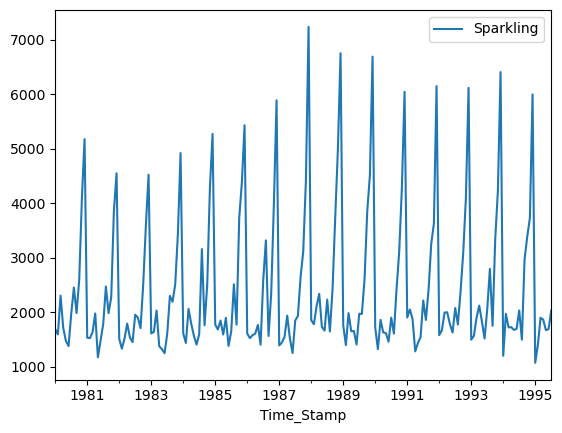

In [13]:
df.plot()
plt.show()

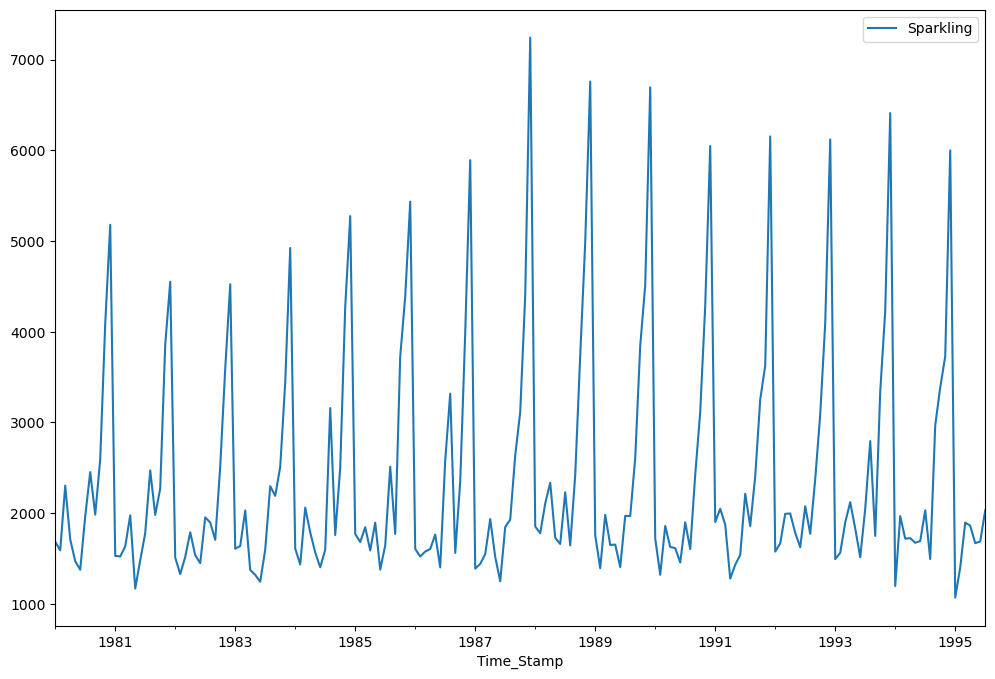

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df.plot()
plt.show()

## 1.2) Ans:

In [15]:
## Checking for missing value
df.isnull().sum()

Sparkling    0
dtype: int64

In [16]:
## EDA 

In [17]:
df.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


### Yearly BoxPlots

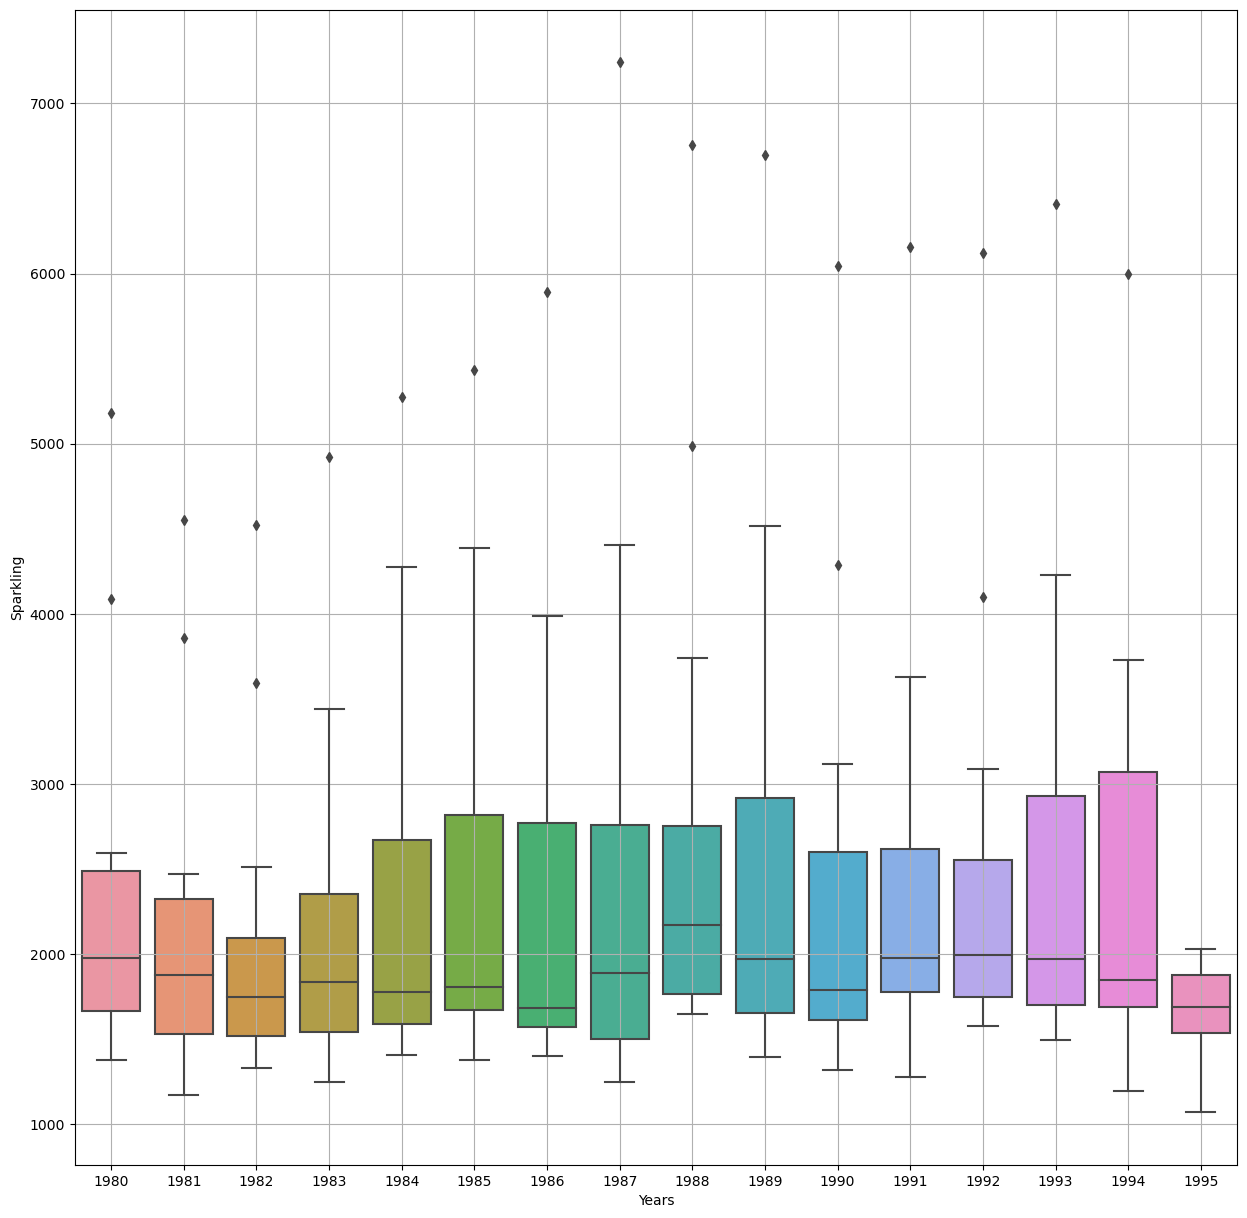

In [18]:
fig, ax = plt.subplots(figsize=(15,15))
sns.boxplot(x=df.index.year, y=df['Sparkling'], ax=ax, whis=1.5) 
plt.grid()
plt.xlabel('Years')
plt.ylabel('Sparkling');

### Monthly BoxPlots

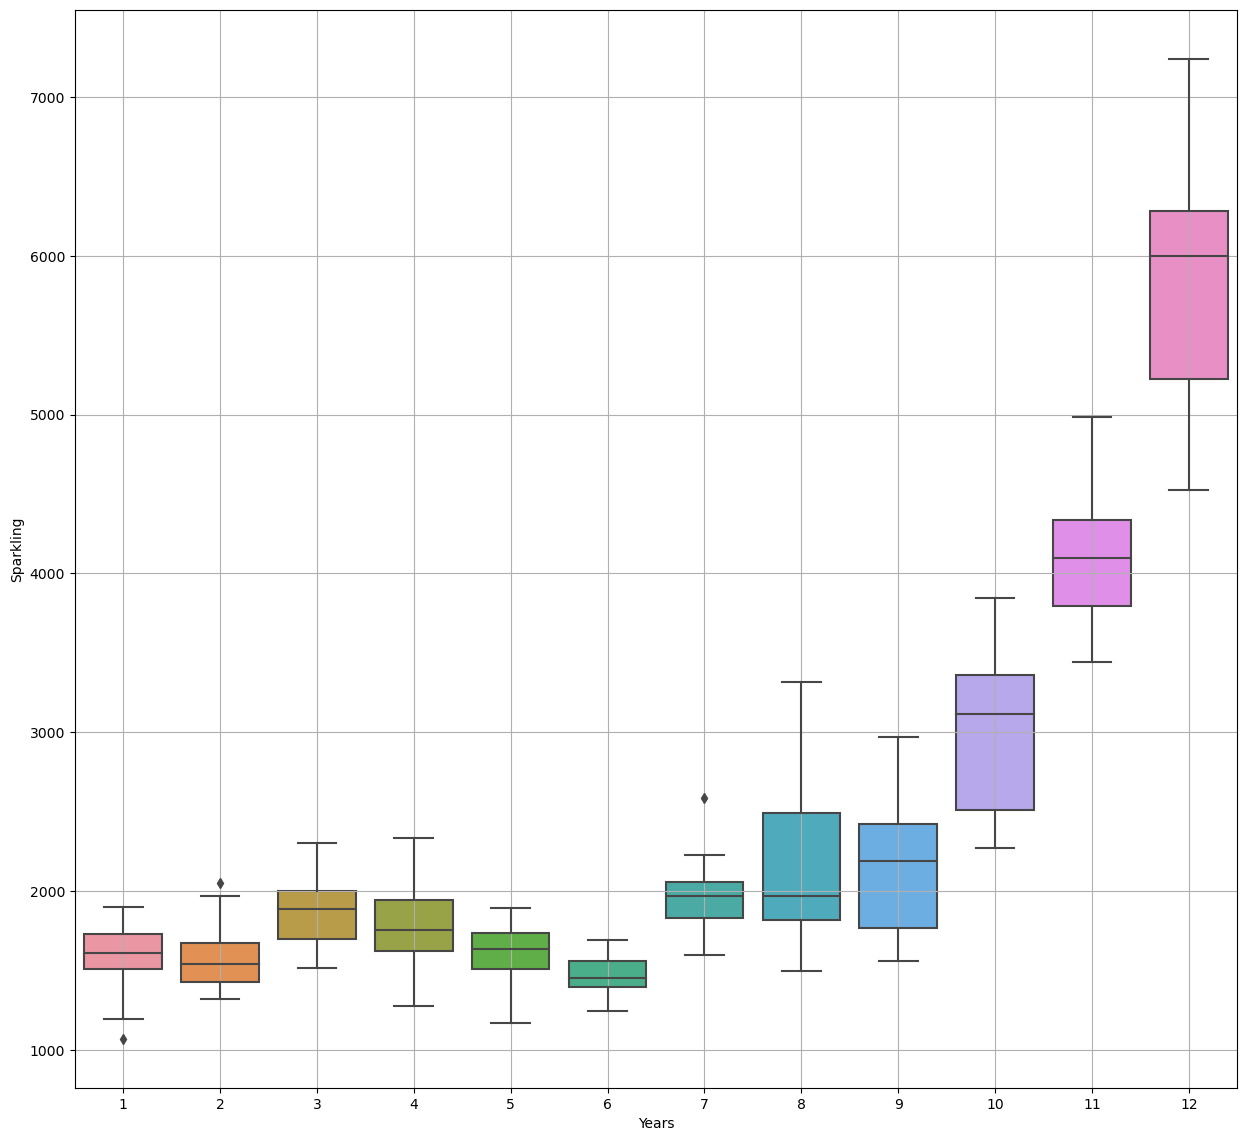

In [19]:
fig, ax = plt.subplots(figsize=(15,14))
sns.boxplot(x=df.index.month, y=df['Sparkling'], ax=ax, whis=1.5) 
plt.grid()
plt.xlabel('Years')
plt.ylabel('Sparkling');

### Monthplot of the given time series

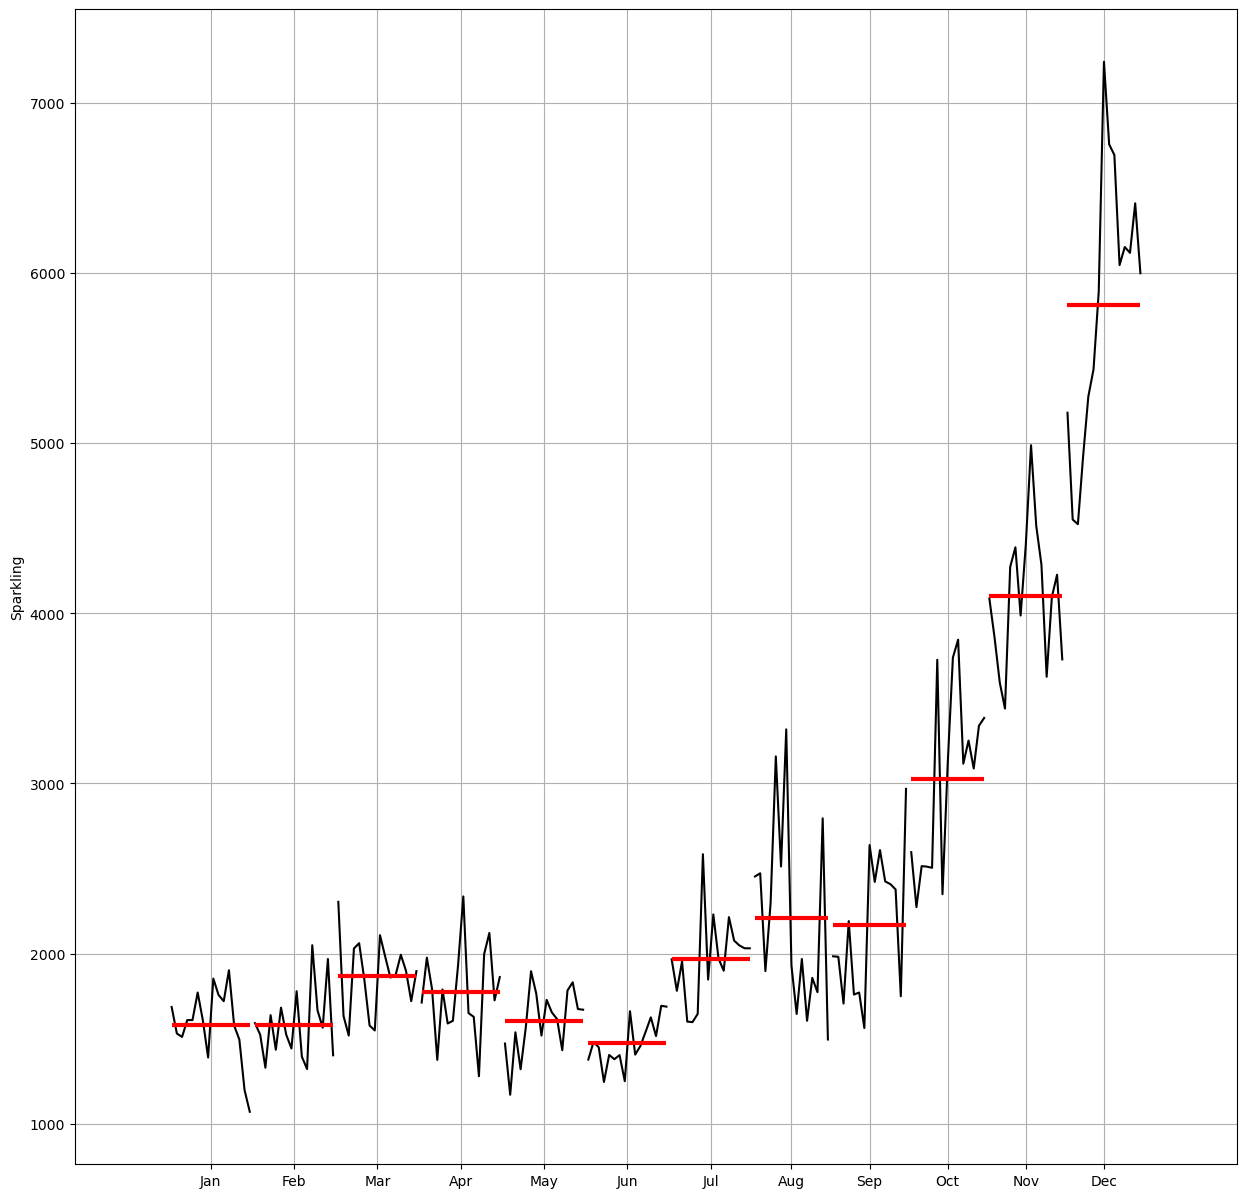

In [20]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(15,15))

month_plot(df, ylabel='Sparkling',ax=ax)
plt.grid();

### Time Series according to different months for different years.

In [21]:
yearly_wine_sales_across_months = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, 
                                        index = df.index.year)

yearly_wine_sales_across_months

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


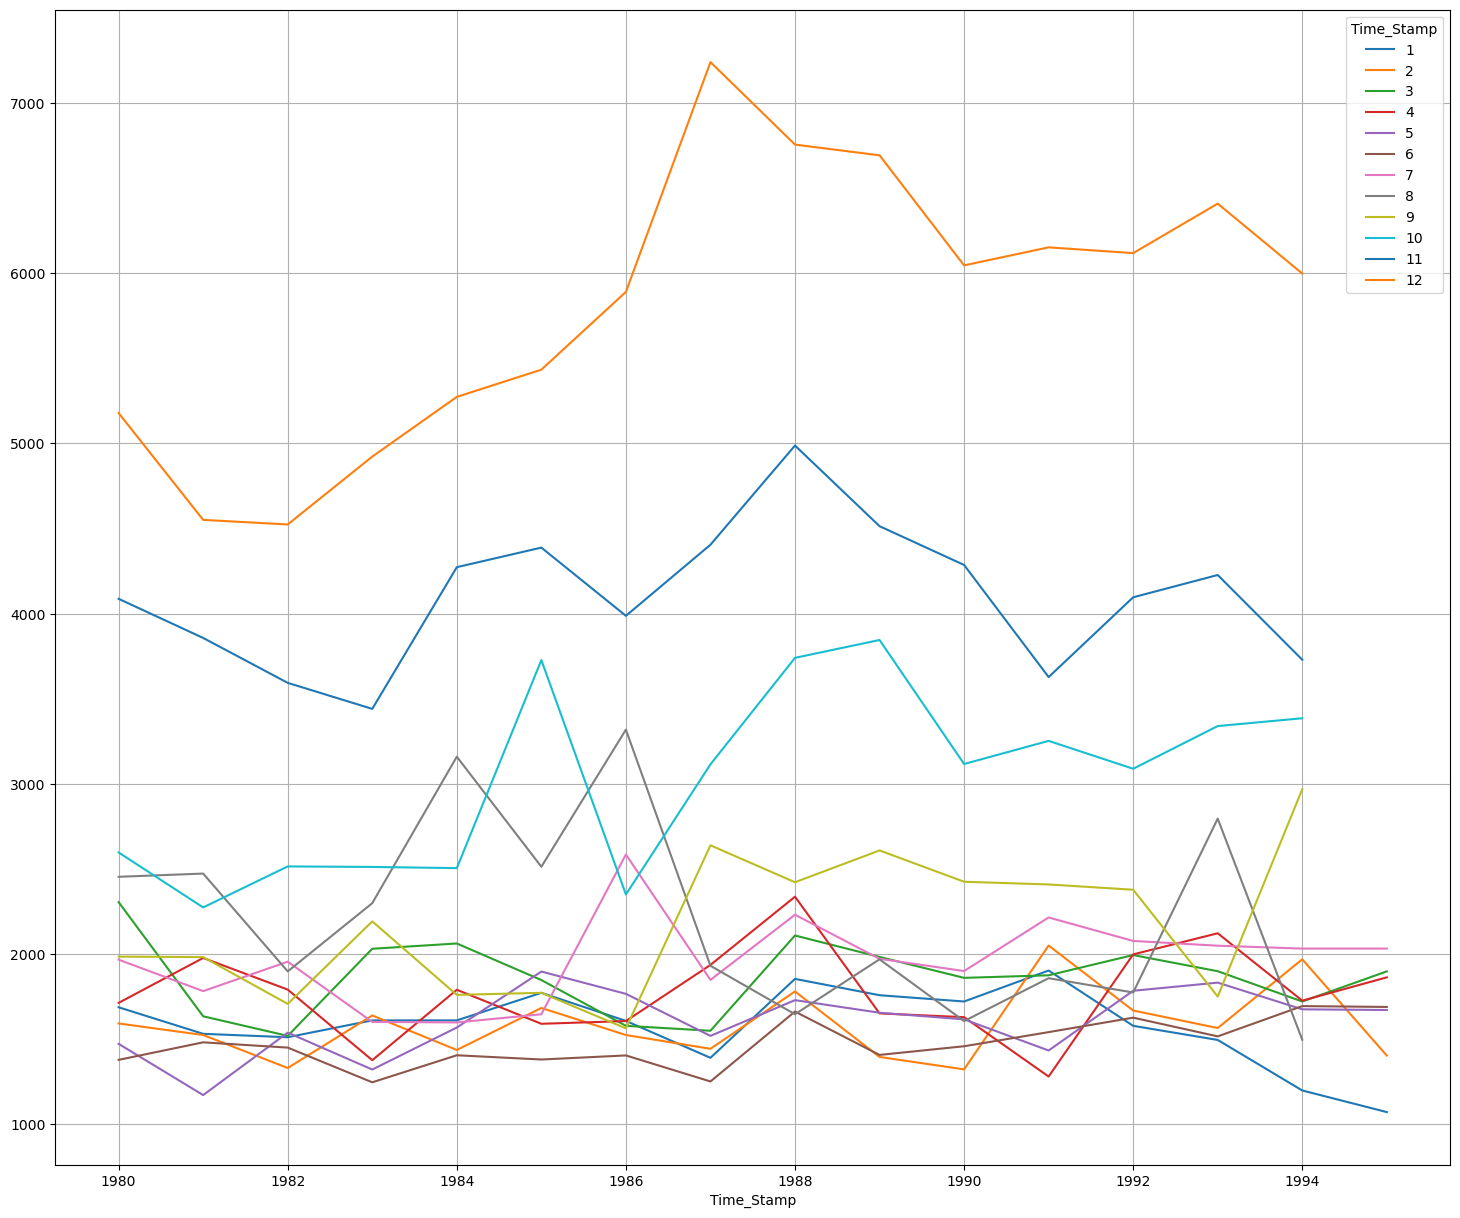

In [22]:
fig, ax = plt.subplots(figsize=(18,15))
yearly_wine_sales_across_months.plot(ax=ax)
plt.grid();

### Decomposition

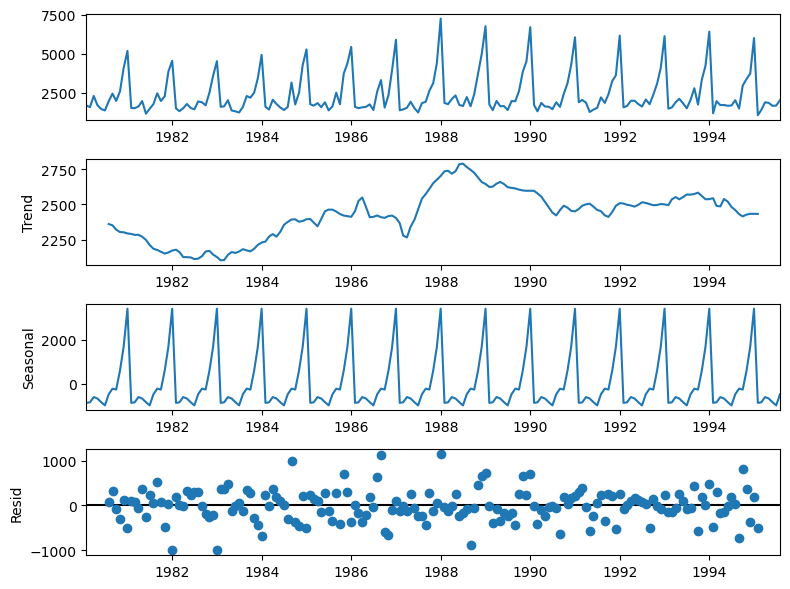

In [23]:
rcParams['figure.figsize'] =8,6
decomposition_add = seasonal_decompose(df,model='additive', period =12)
decomposition_add.plot();

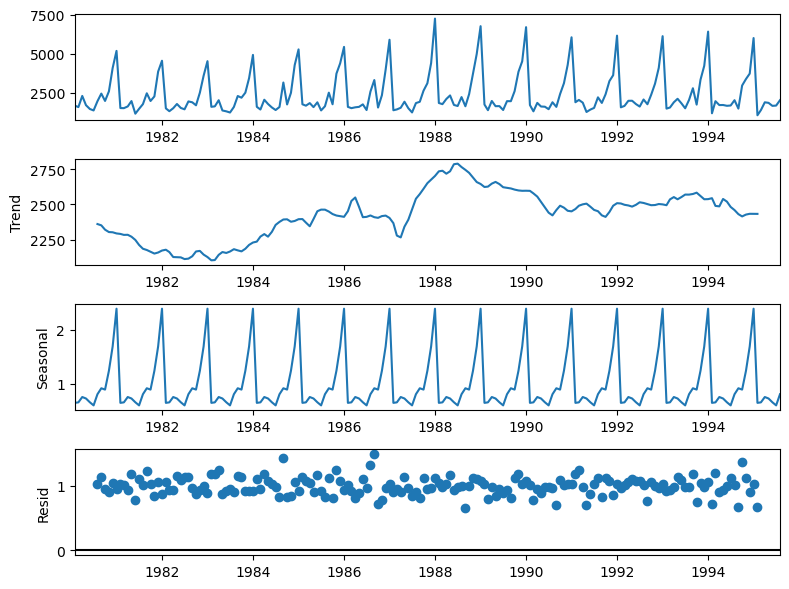

In [24]:
decomposition_mul = seasonal_decompose(df,model='multiplicative')
decomposition_mul.plot();

In [25]:
trend = decomposition_mul.trend
seasonality = decomposition_mul.seasonal
residual = decomposition_mul.resid

print('Trend','\n',trend.round(2).head(12),'\n')
print('Seasonality','\n',seasonality.round(2).head(12),'\n')
print('Residual','\n',residual.round(2).head(12),'\n')

Trend 
 Time_Stamp
1980-01-31        NaN
1980-02-29        NaN
1980-03-31        NaN
1980-04-30        NaN
1980-05-31        NaN
1980-06-30        NaN
1980-07-31    2360.67
1980-08-31    2351.33
1980-09-30    2320.54
1980-10-31    2303.58
1980-11-30    2302.04
1980-12-31    2293.79
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.65
1980-02-29    0.66
1980-03-31    0.76
1980-04-30    0.73
1980-05-31    0.66
1980-06-30    0.60
1980-07-31    0.81
1980-08-31    0.92
1980-09-30    0.89
1980-10-31    1.24
1980-11-30    1.69
1980-12-31    2.38
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31     NaN
1980-02-29     NaN
1980-03-31     NaN
1980-04-30     NaN
1980-05-31     NaN
1980-06-30     NaN
1980-07-31    1.03
1980-08-31    1.14
1980-09-30    0.96
1980-10-31    0.91
1980-11-30    1.05
1980-12-31    0.95
Name: resid, dtype: float64 



## 1.3) Ans:

In [26]:
### Split a data into Train and Test

train = df[df.index.year < 1991] 
test = df[df.index.year >= 1991]

In [27]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


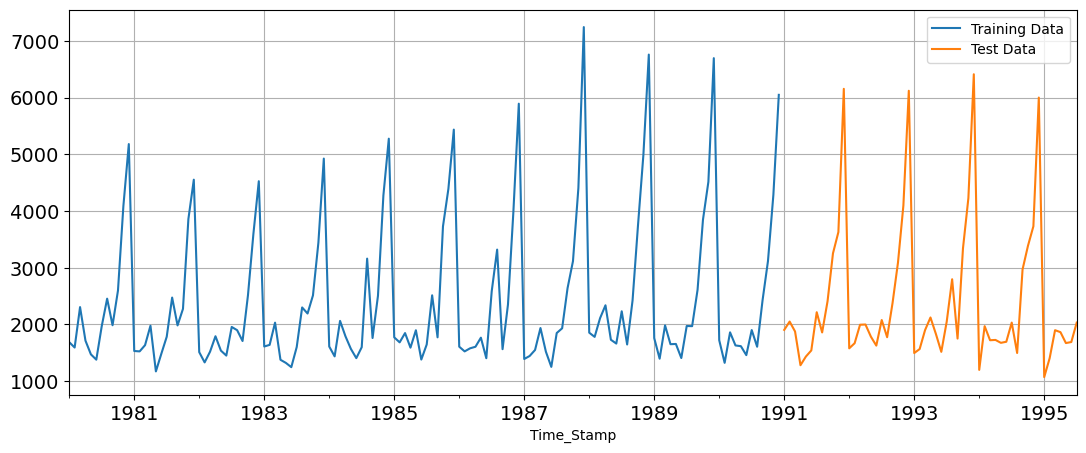

In [28]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## 1.4) Ans:

### Model 1: Linear Regression

In [29]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [30]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [31]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

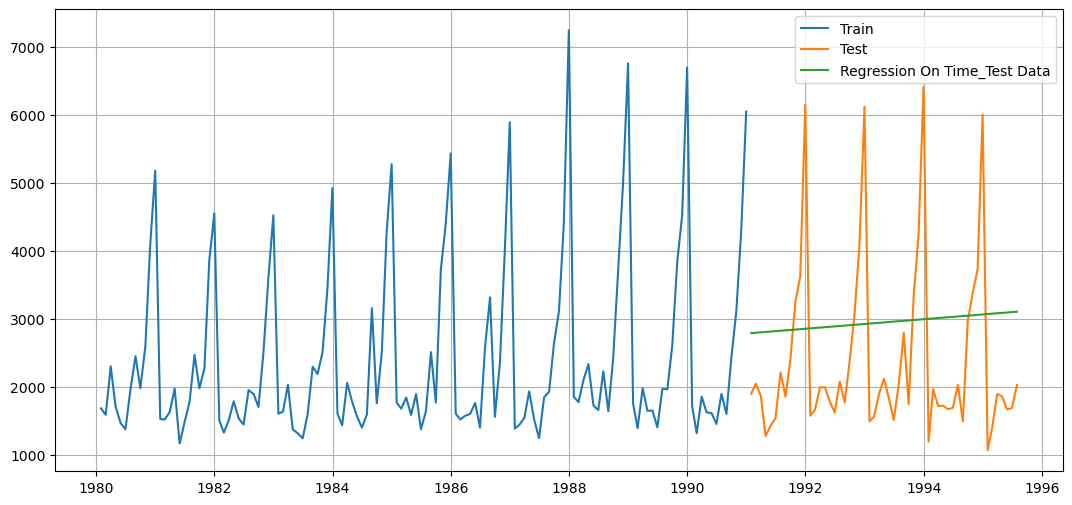

In [35]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [36]:
### Model Evaluation
# Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.14


In [37]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,1389.135175


In [38]:
results_final=resultsDf.copy()

### Model 2: Naive Forecast

In [39]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [40]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

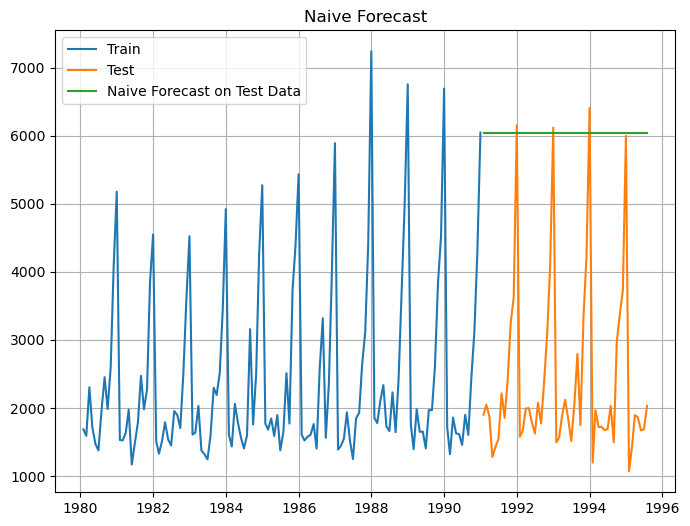

In [41]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [42]:
### Model Evaluation
# Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [43]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])
resultsDf_2

,Test RMSE
NaiveModel,3864.279352


In [44]:
results_final=pd.concat([results_final,resultsDf_2])
results_final

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352


### Model 3: Simple Average

In [45]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [46]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


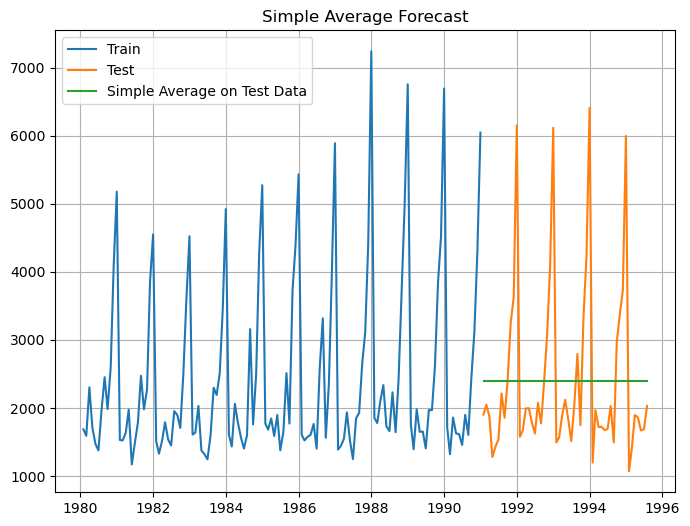

In [47]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [48]:
### Model Evaluation
# Test Data - RMSE

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [49]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])
resultsDf_3

,Test RMSE
SimpleAverageModel,1275.081804


In [50]:
results_final=pd.concat([results_final,resultsDf_3])
results_final

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


### Model 4: Simple Exponential Smoothing

In [51]:
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display

In [52]:
SES_train = train.copy()
SES_test = test.copy()

In [53]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'], initialization_method='estimated')

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [54]:
model_SES_autofit = model_SES.fit(optimized=True)
model_SES_autofit.params

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.07029459943040381,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.1004162520212,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [55]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,2804.687529
1991-02-28,2049,2804.687529
1991-03-31,1874,2804.687529
1991-04-30,1279,2804.687529
1991-05-31,1432,2804.687529


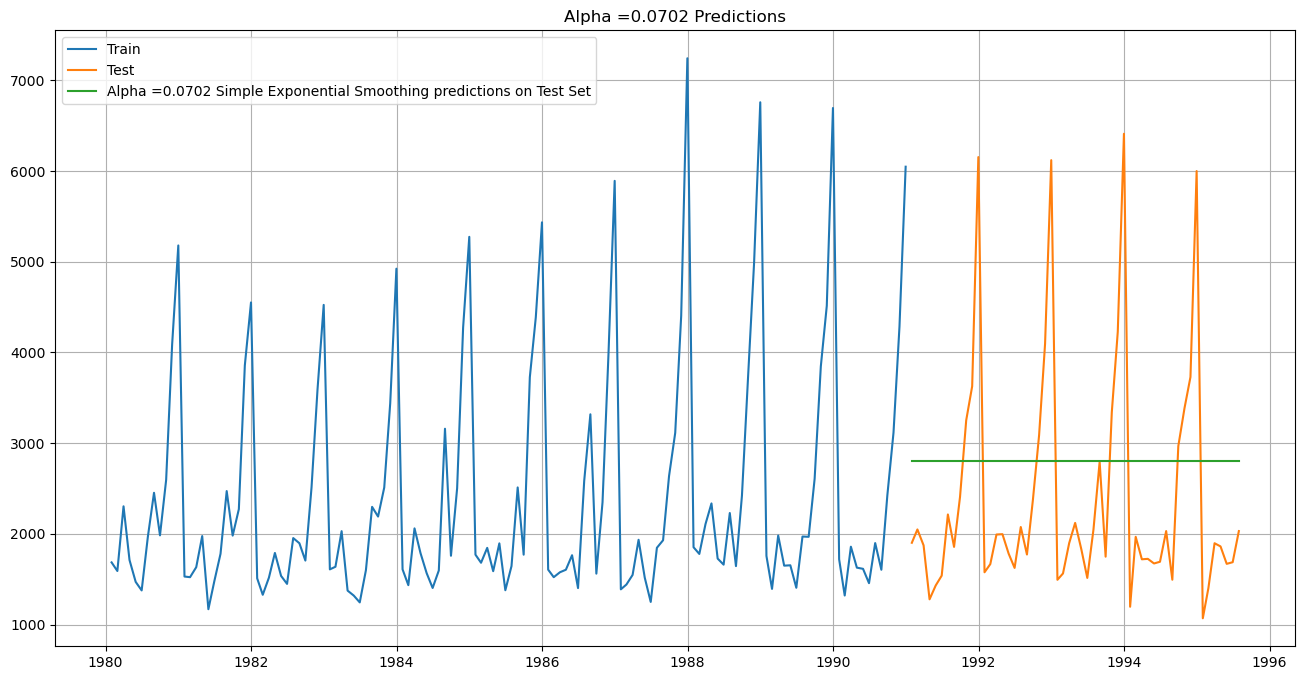

In [56]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0702 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0702 Predictions');

In [57]:
### Model Evaluation
# Test Data - RMSE

rmse_model4_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha = 0.0702 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model4_test_1))

For Alpha = 0.0702 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1338.012


In [58]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_1]},index=['Alpha=0.0702,SimpleExponentialSmoothing'])
resultsDf_4

,Test RMSE
"Alpha=0.0702,SimpleExponentialSmoothing",1338.012144


In [59]:
results_final=pd.concat([results_final,resultsDf_4])
results_final

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
"Alpha=0.0702,SimpleExponentialSmoothing",1338.012144


In [60]:
resultsDf_5 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_5

,Alpha Values,Train RMSE,Test RMSE


In [61]:
for i in np.arange(0.03,0.1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    rmse_model4_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model4_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)

    resultsDf_5 = resultsDf_5.append({'Alpha Values':i,'Train RMSE':rmse_model4_train_i 
                                      ,'Test RMSE':rmse_model4_test_i}, ignore_index=True)

In [62]:
resultsDf_5.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.03,1329.877089,1292.565292
1,0.04,1324.937340,1305.283075
2,0.05,1324.401979,1316.359347
3,0.06,1325.784004,1326.904933
4,0.07,1328.055478,1337.680562
5,0.08,1330.734622,1349.162423
6,0.09,1333.572103,1361.662354
7,0.10,1336.428478,1375.393335


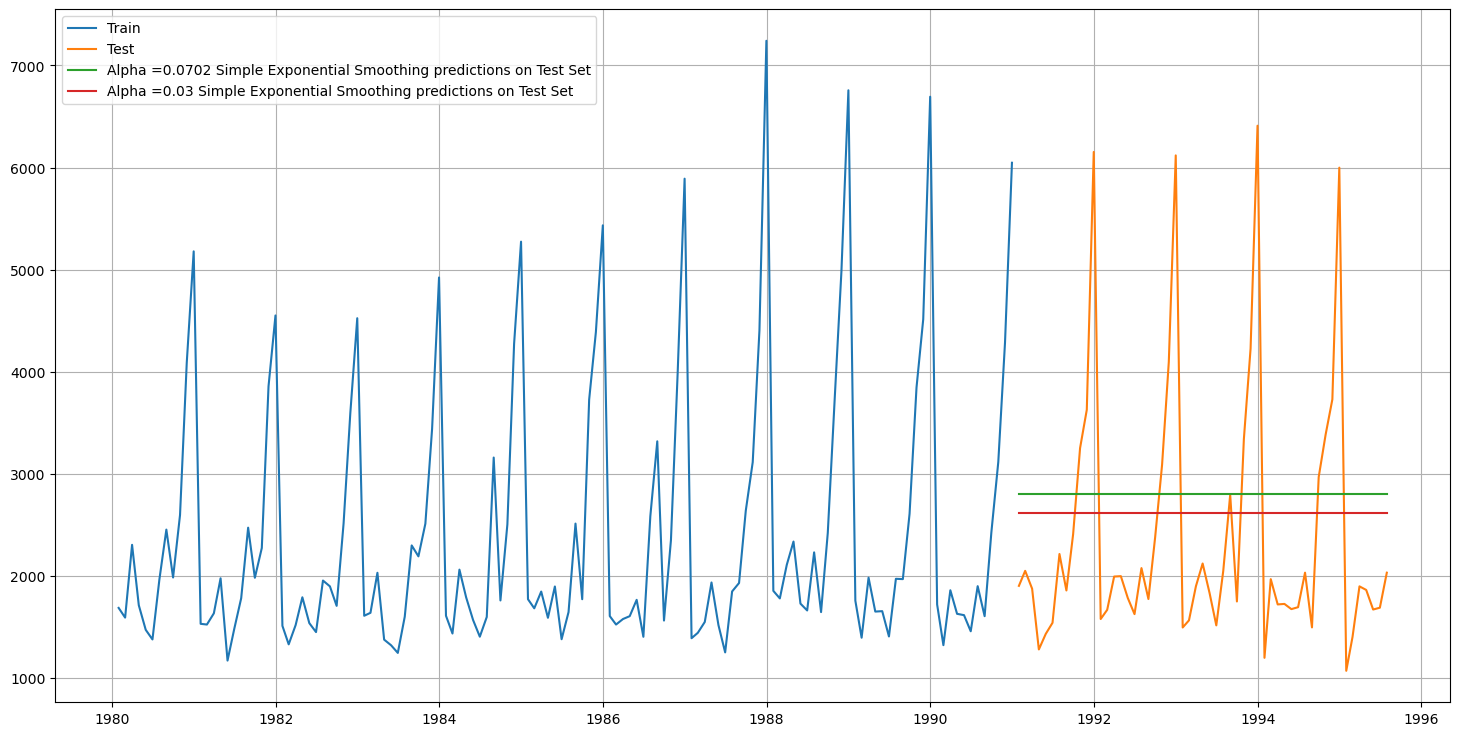

In [63]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.0702 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.03], label='Alpha =0.03 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [64]:
resultsDf_5_1 = pd.DataFrame({'Test RMSE': [resultsDf_5.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.03,SimpleExponentialSmoothing (based on range)'])
resultsDf_5_1

,Test RMSE
"Alpha=0.03,SimpleExponentialSmoothing (based on range)",1292.565292


In [65]:
results_final=pd.concat([results_final,resultsDf_5_1])
results_final

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
"Alpha=0.0702,SimpleExponentialSmoothing",1338.012144
"Alpha=0.03,SimpleExponentialSmoothing (based on range)",1292.565292


### Model 5: Double Exponential Smoothing

In [66]:
DES_train = train.copy()
DES_test = test.copy()

In [67]:
model_DES = Holt(DES_train['Sparkling'], initialization_method='estimated')

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [68]:
model_DES_autofit = model_DES.fit(optimized=True)
model_DES_autofit.params

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.6638769092832238,
 'smoothing_trend': 9.966251357628782e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1502.5681711003654,
 'initial_trend': 29.020225552837097,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [69]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,5330.501799
1991-02-28,2049,5359.520204
1991-03-31,1874,5388.538609
1991-04-30,1279,5417.557013
1991-05-31,1432,5446.575418


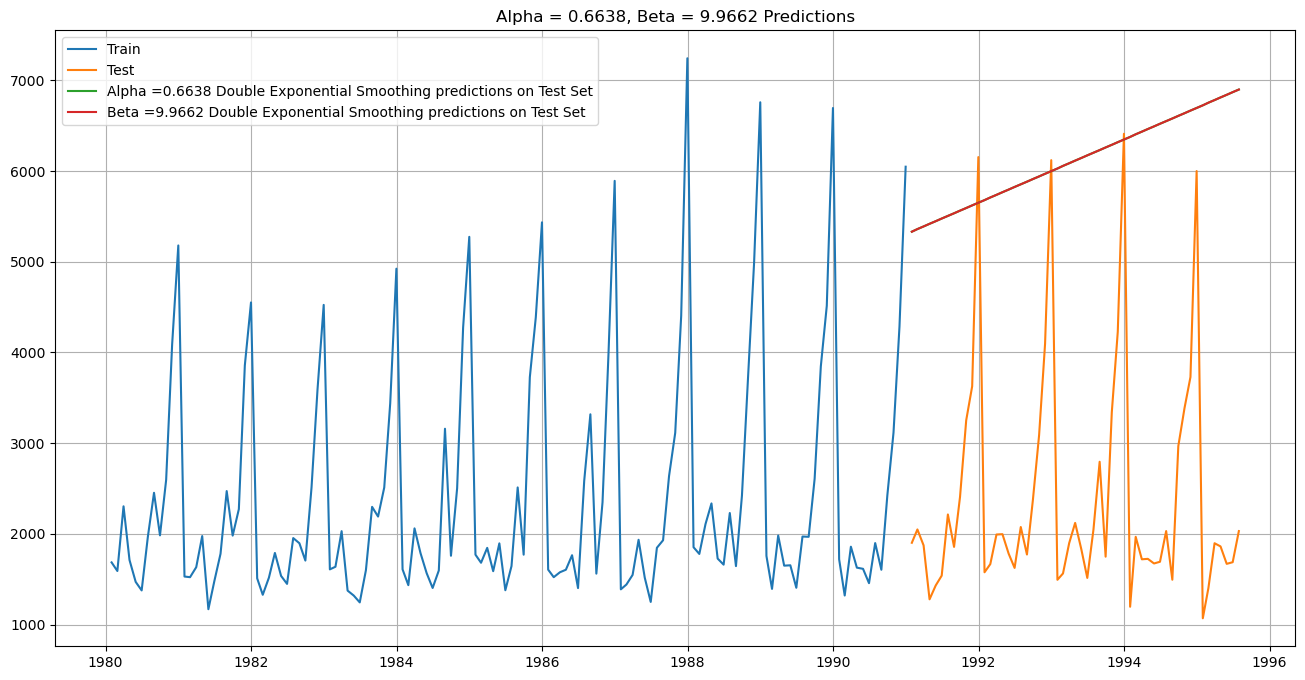

In [70]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict'], label='Alpha =0.6638 Double Exponential Smoothing predictions on Test Set')
plt.plot(DES_test['predict'], label='Beta =9.9662 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.6638, Beta = 9.9662 Predictions');

In [71]:
### Model Evaluation
# Test Data - RMSE

rmse_model5_test_1 = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict'],squared=False)
print("For Alpha = 0.6638, Beta = 9.9662, Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha = 0.6638, Beta = 9.9662, Double Exponential Smoothing Model forecast on the Test Data, RMSE is 3949.993


In [72]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.6638, Beta = 9.9662, DoubleExponentialSmoothing'])
resultsDf_6

,Test RMSE
"Alpha=0.6638, Beta = 9.9662, DoubleExponentialSmoothing",3949.99329


In [73]:
results_final=pd.concat([results_final,resultsDf_6])
results_final

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
"Alpha=0.0702,SimpleExponentialSmoothing",1338.012144
"Alpha=0.03,SimpleExponentialSmoothing (based on range)",1292.565292
"Alpha=0.6638, Beta = 9.9662, DoubleExponentialSmoothing",3949.993290


In [74]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [75]:
for i in np.arange(0.3,1,0.1):
    for j in np.arange(0.5,10,0.5):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [76]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.3,0.5,1.770742e+03,3.440151e+04
1,0.3,1.0,1.873178e+03,4.688609e+04
2,0.3,1.5,1.781907e+03,4.690770e+04
3,0.3,2.0,1.969862e+03,7.014905e+04
4,0.3,2.5,2.302573e+03,8.991556e+04
...,...,...,...,...
128,0.9,7.5,3.711909e+99,7.739780e+102
129,0.9,8.0,8.572633e+103,1.932778e+107
130,0.9,8.5,9.646942e+107,2.338057e+111
131,0.9,9.0,5.825169e+111,1.510065e+115


In [77]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
12,0.3,6.5,3363.517467,18126.679795
48,0.5,5.5,5805.410051,33046.206480
82,0.7,3.5,6420.707661,33710.892329
0,0.3,0.5,1770.742163,34401.512440
11,0.3,6.0,3746.775558,37239.072494


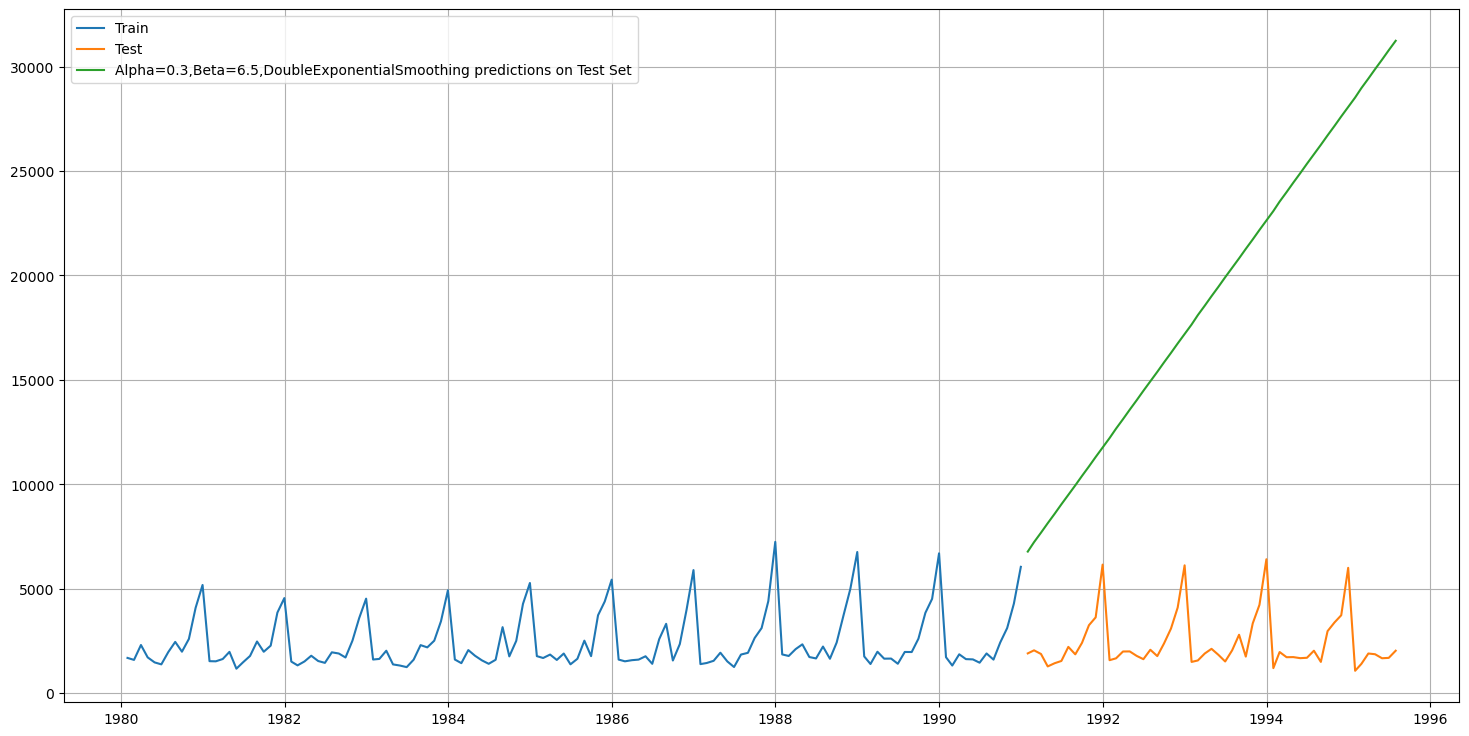

In [78]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.3, 6.5], label='Alpha=0.3,Beta=6.5,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [79]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=6.5,DoubleExponentialSmoothing (based on range)'])
resultsDf_7_1

,Test RMSE
"Alpha=0.3,Beta=6.5,DoubleExponentialSmoothing (based on range)",18126.679795


In [80]:
results_final=pd.concat([results_final,resultsDf_7_1])
results_final

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
"Alpha=0.0702,SimpleExponentialSmoothing",1338.012144
"Alpha=0.03,SimpleExponentialSmoothing (based on range)",1292.565292
"Alpha=0.6638, Beta = 9.9662, DoubleExponentialSmoothing",3949.993290
"Alpha=0.3,Beta=6.5,DoubleExponentialSmoothing (based on range)",18126.679795


### Model 6: Triple Exponential Smoothing

In [81]:
TES_train = train.copy()
TES_test = test.copy()

In [82]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [83]:
model_TES_autofit = model_TES.fit()

In [84]:
model_TES_autofit.params

{'smoothing_level': 0.11194572287706502,
 'smoothing_trend': 0.04979454913988668,
 'smoothing_seasonal': 0.3616765678435302,
 'damping_trend': nan,
 'initial_level': 2356.340229937152,
 'initial_trend': -10.519480221963526,
 'initial_seasons': array([0.71465118, 0.68302129, 0.90263858, 0.80589958, 0.65660325,
        0.65654363, 0.88525948, 1.132562  , 0.92225104, 1.21110112,
        1.8820382 , 2.38194187]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [85]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Sparkling,auto_predict
Time_Stamp,,
1991-01-31,1902,1586.782642
1991-02-28,2049,1355.896477
1991-03-31,1874,1762.095344
1991-04-30,1279,1655.471900
1991-05-31,1432,1541.320914


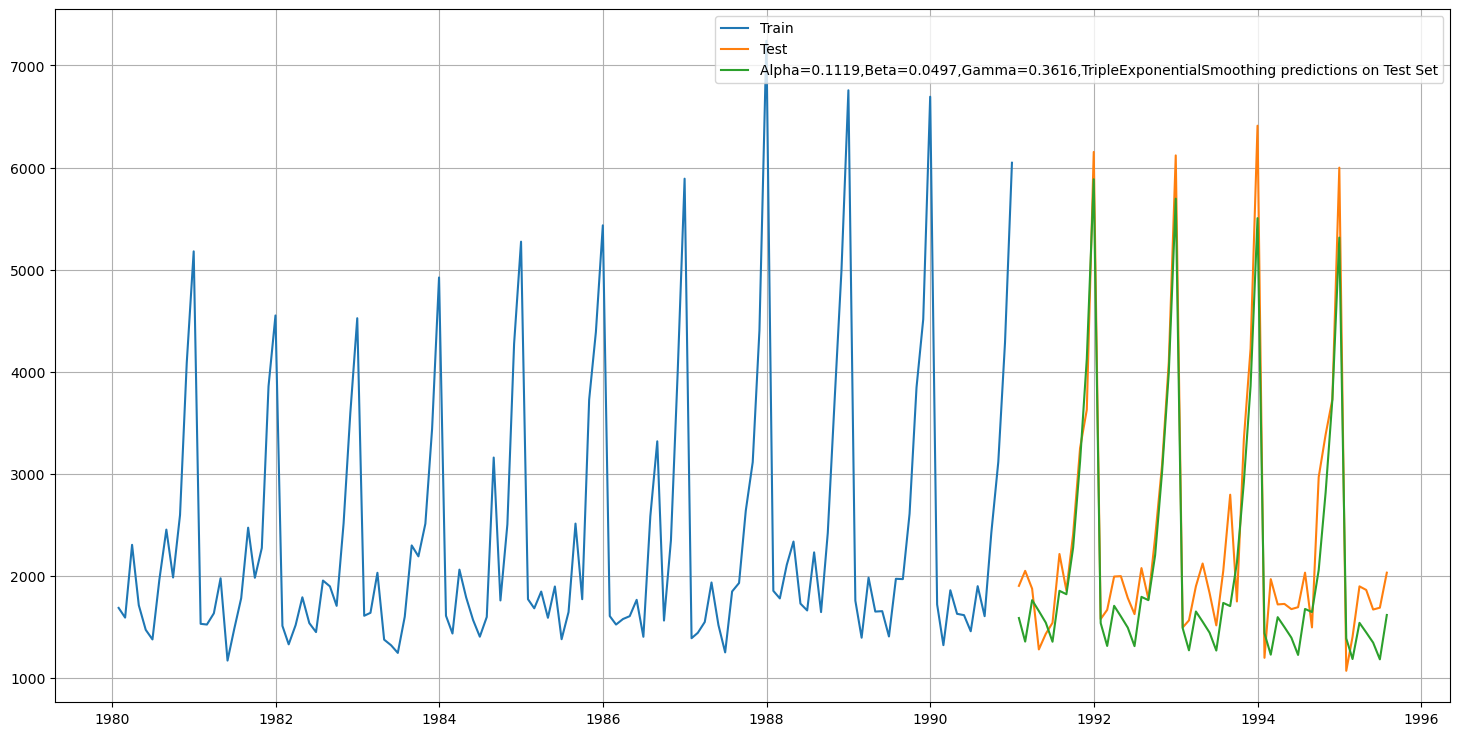

In [86]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.1119,Beta=0.0497,Gamma=0.3616,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [87]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.1119,Beta=0.0497,Gamma=0.3616, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

For Alpha=0.1119,Beta=0.0497,Gamma=0.3616, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 406.510


In [88]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1]}
                           ,index=['Alpha=0.1119,Beta=0.0497,Gamma=0.3616,TripleExponentialSmoothing'])

resultsDf_8_1

,Test RMSE
"Alpha=0.1119,Beta=0.0497,Gamma=0.3616,TripleExponentialSmoothing",406.51017


In [89]:
results_final=pd.concat([results_final,resultsDf_8_1])
results_final

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
"Alpha=0.0702,SimpleExponentialSmoothing",1338.012144
"Alpha=0.03,SimpleExponentialSmoothing (based on range)",1292.565292
"Alpha=0.6638, Beta = 9.9662, DoubleExponentialSmoothing",3949.993290
"Alpha=0.3,Beta=6.5,DoubleExponentialSmoothing (based on range)",18126.679795
"Alpha=0.1119,Beta=0.0497,Gamma=0.3616,TripleExponentialSmoothing",406.510170


In [90]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [91]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [92]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.1,0.1,0.1,3.814397e+02,5.910387e+02
1,0.1,0.1,0.2,3.677929e+02,6.214407e+02
2,0.1,0.1,0.3,3.614334e+02,6.395595e+02
3,0.1,0.1,0.4,3.607002e+02,6.447910e+02
4,0.1,0.1,0.5,3.644451e+02,6.410980e+02
...,...,...,...,...,...
995,1.0,1.0,0.6,1.882994e+05,4.386054e+06
996,1.0,1.0,0.7,2.660015e+05,8.649577e+06
997,1.0,1.0,0.8,1.101923e+06,2.700435e+05
998,1.0,1.0,0.9,7.695708e+04,2.472201e+05


In [93]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
301,0.4,0.1,0.2,384.467709,317.434302
211,0.3,0.2,0.2,388.544148,329.037543
200,0.3,0.1,0.1,388.220071,337.080969
110,0.2,0.2,0.1,398.482510,340.186457
402,0.5,0.1,0.3,396.598057,345.913415


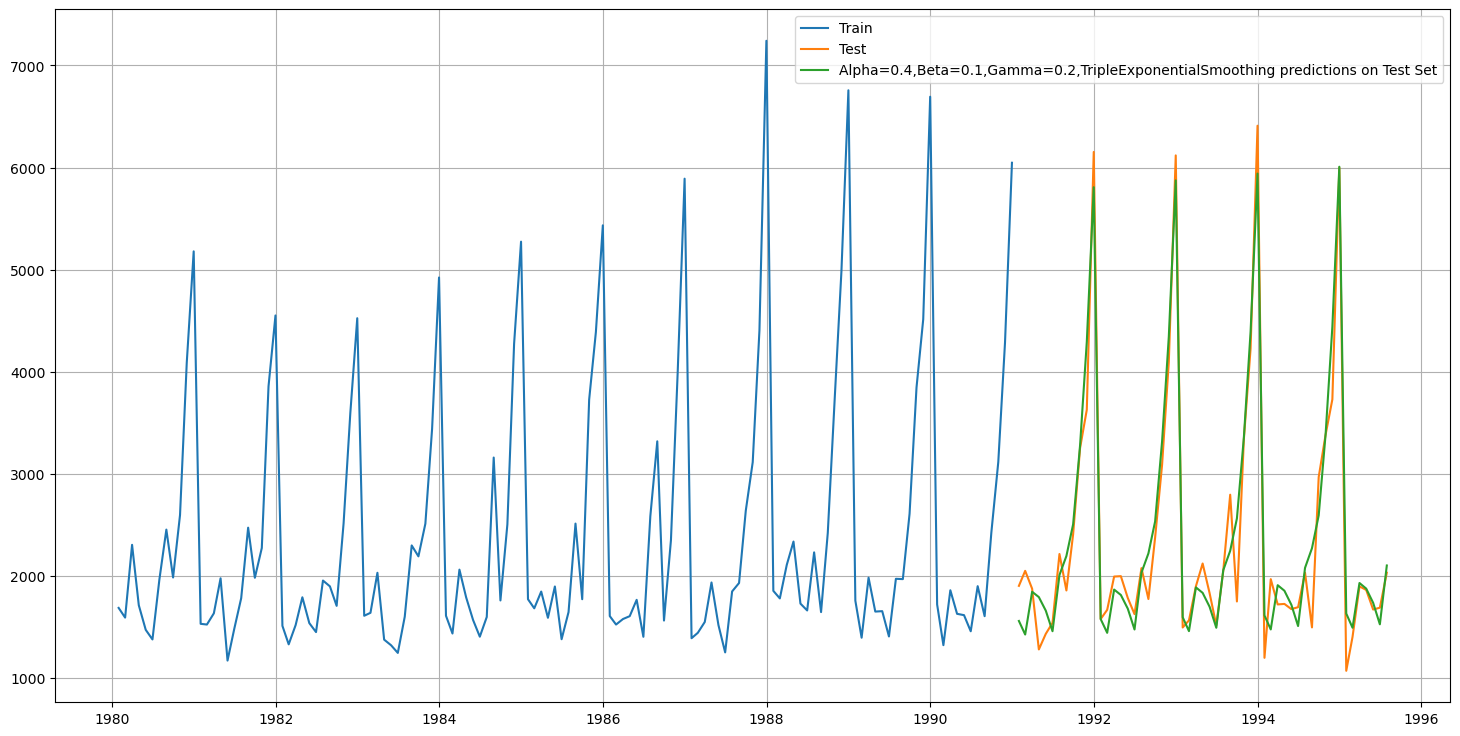

In [94]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['predict', 0.4, 0.1, 0.2], label='Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [95]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing (based on range)'])

resultsDf_8_3

,Test RMSE
"Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing (based on range)",317.434302


In [96]:
results_final=pd.concat([results_final,resultsDf_8_3])
results_final

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
"Alpha=0.0702,SimpleExponentialSmoothing",1338.012144
"Alpha=0.03,SimpleExponentialSmoothing (based on range)",1292.565292
"Alpha=0.6638, Beta = 9.9662, DoubleExponentialSmoothing",3949.993290
"Alpha=0.3,Beta=6.5,DoubleExponentialSmoothing (based on range)",18126.679795
"Alpha=0.1119,Beta=0.0497,Gamma=0.3616,TripleExponentialSmoothing",406.510170
"Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing (based on range)",317.434302


## 1.5) Ans:

In [97]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [98]:
dftest = adfuller(train['Sparkling'])#Stationarity check on train time series data 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.209
DF test p-value is 0.6697


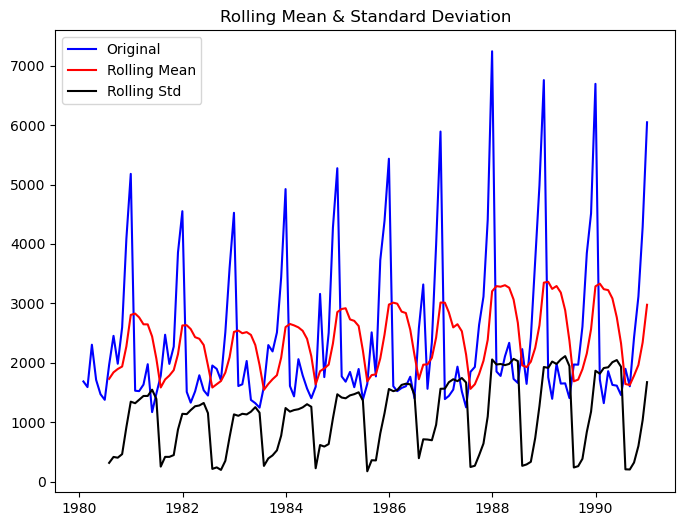

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [99]:
test_stationarity(train['Sparkling'])

**1st difference (d=1)**

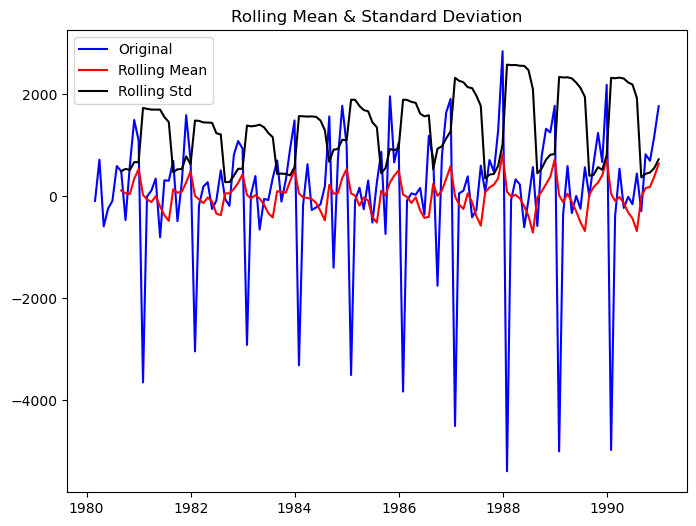

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [100]:
test_stationarity(train['Sparkling'].diff().dropna())

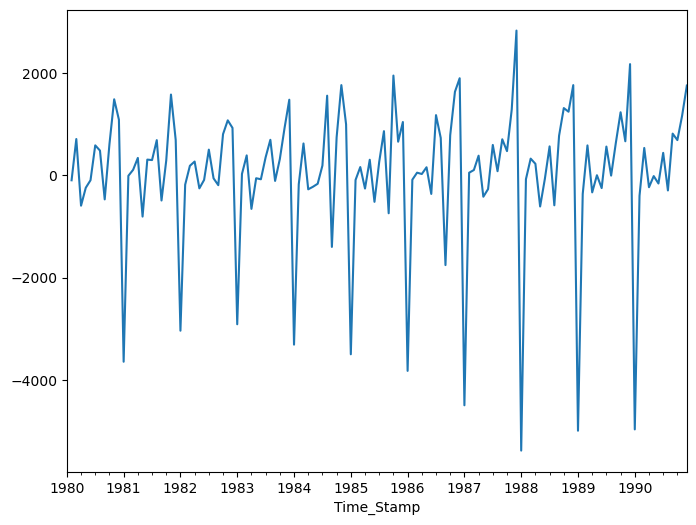

In [101]:
test_stationarity_diff = (train['Sparkling']).diff()
test_stationarity_diff.plot();

**log 10**

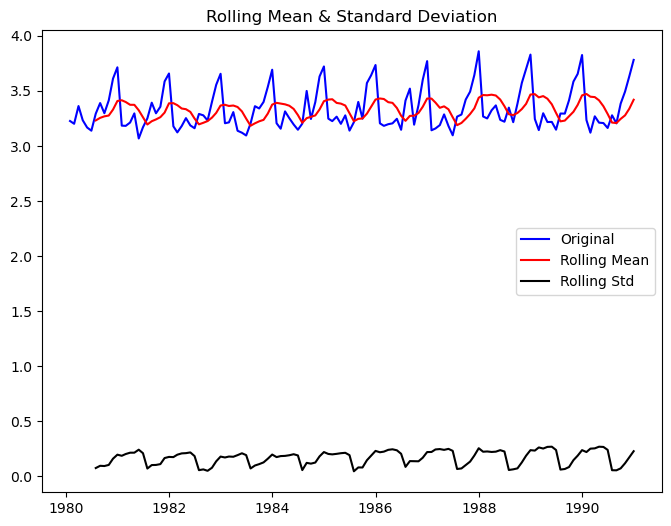

Results of Dickey-Fuller Test:
Test Statistic                  -1.498035
p-value                          0.534483
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [102]:
test_stationarity(np.log10(train['Sparkling']))

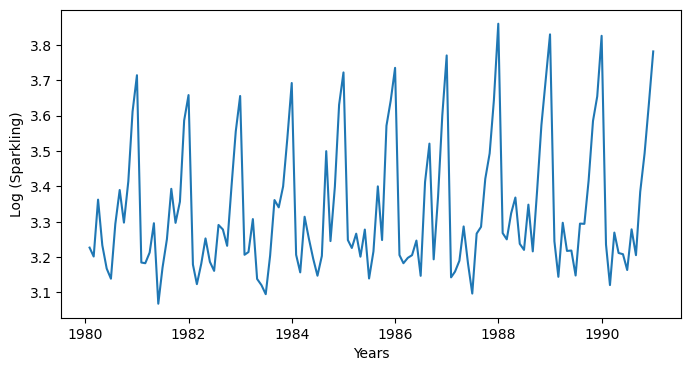

In [103]:
plt.figure(figsize=(8, 4))
plt.plot(np.log10(train['Sparkling']))
plt.xlabel('Years')
plt.ylabel('Log (Sparkling)');

**log 10 - 1st difference (d=1)**

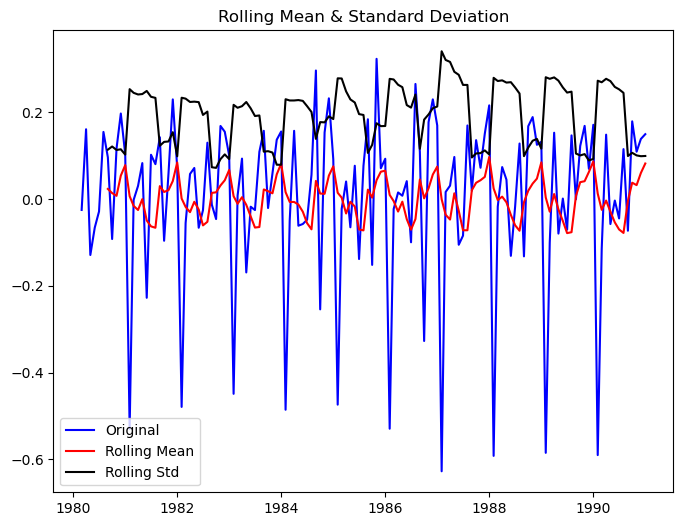

Results of Dickey-Fuller Test:
Test Statistic                -8.091166e+00
p-value                        1.377051e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [104]:
test_stationarity(np.log10(train['Sparkling']).diff().dropna())

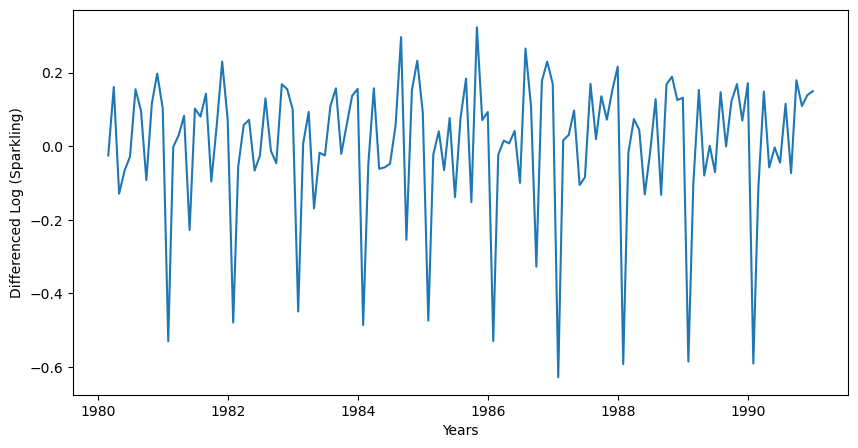

In [105]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(train['Sparkling']).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Sparkling)');

## 1.6) Ans:

## ARIMA model automated version

In [106]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [107]:
# Creating a Dataframe 
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [108]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323130674
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.7550946742404
ARIMA(1, 1, 2) - AIC:2234.5272004519366
ARIMA(2, 1, 0) - AIC:2260.365743968097
ARIMA(2, 1, 1) - AIC:2233.7776262581274
ARIMA(2, 1, 2) - AIC:2213.5092170036614


In [109]:
## Sort the above AIC values in the ascending order

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2213.509217
7,"(2, 1, 1)",2233.777626
2,"(0, 1, 2)",2234.408323
5,"(1, 1, 2)",2234.527200
4,"(1, 1, 1)",2235.755095
6,"(2, 1, 0)",2260.365744
1,"(0, 1, 1)",2263.060016
3,"(1, 1, 0)",2266.608539
0,"(0, 1, 0)",2267.663036


In [110]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sat, 16 Dec 2023   AIC                           2213.509
Time:                        17:43:43   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.786      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.731      0.000      -0.701      -0.417
ma.L1         -1.9916      0.110    -18.184      0.0

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


**Prediction on the test set**

In [111]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [112]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print("RMSE is %4.2f" %rmse)

RMSE is 1299.98


In [113]:
temp_resultsDf0 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA-AIC(2,1,2)'])
temp_resultsDf0

,Test RMSE
"ARIMA-AIC(2,1,2)",1299.979692


In [114]:
results_final=pd.concat([results_final,temp_resultsDf0])
results_final

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
"Alpha=0.0702,SimpleExponentialSmoothing",1338.012144
"Alpha=0.03,SimpleExponentialSmoothing (based on range)",1292.565292
"Alpha=0.6638, Beta = 9.9662, DoubleExponentialSmoothing",3949.993290
"Alpha=0.3,Beta=6.5,DoubleExponentialSmoothing (based on range)",18126.679795
"Alpha=0.1119,Beta=0.0497,Gamma=0.3616,TripleExponentialSmoothing",406.510170
"Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing (based on range)",317.434302
"ARIMA-AIC(2,1,2)",1299.979692


In [115]:
pred_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

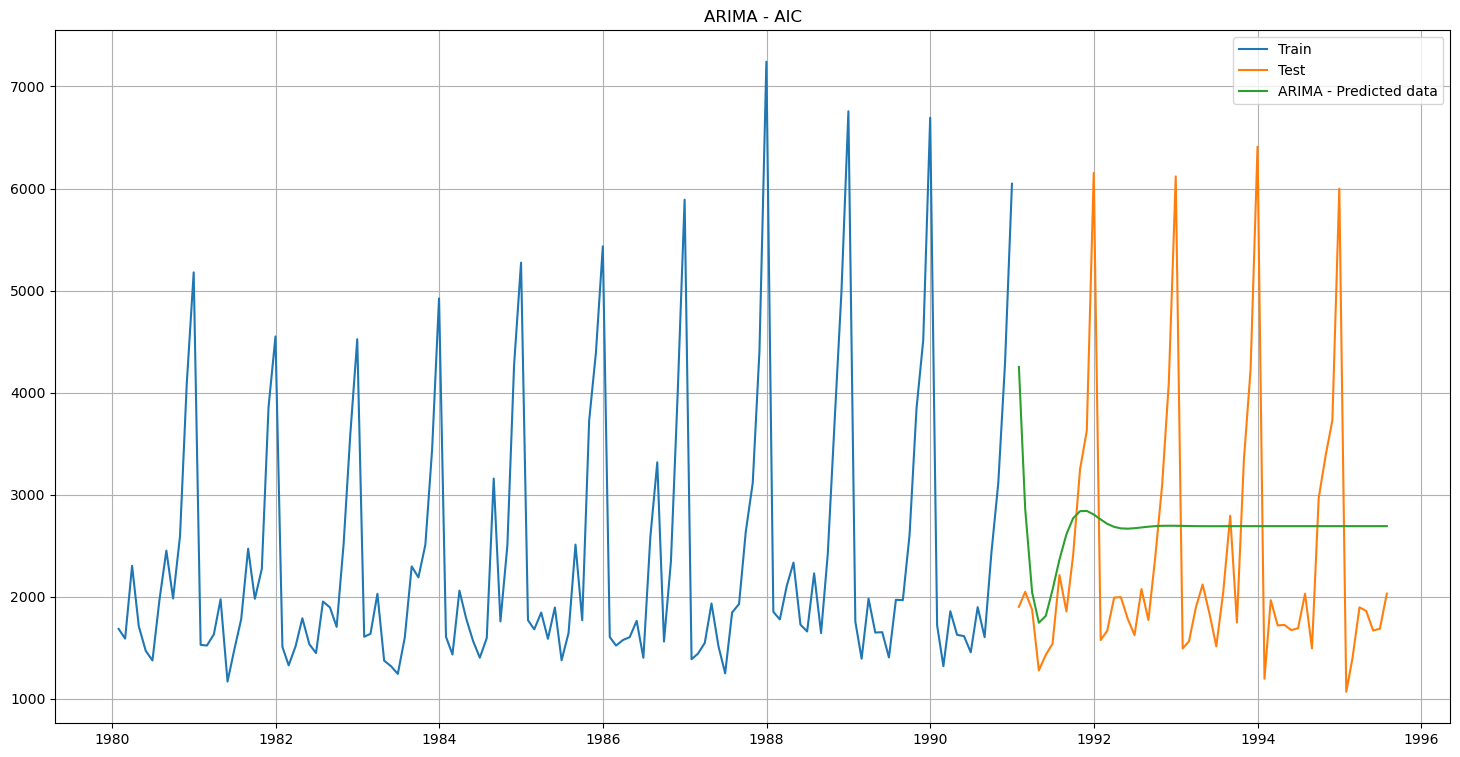

In [116]:
plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(test['Sparkling'].index, pred_ARIMA, label='ARIMA - Predicted data')

plt.title('ARIMA - AIC')
plt.legend(loc='best')
plt.grid();

## ARIMA model - ACF and PACF

In [117]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

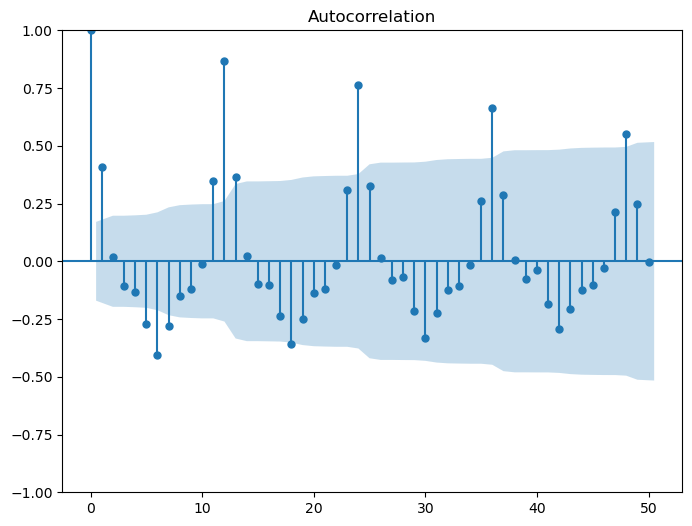

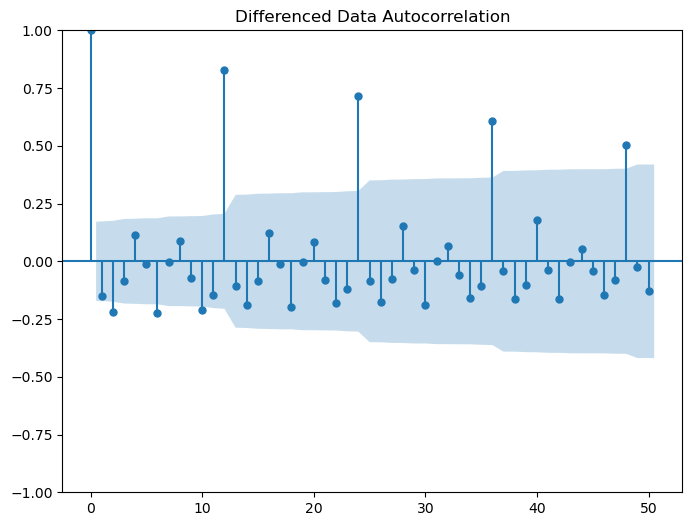

In [118]:
#ACF
plot_acf(train['Sparkling'],lags=50)
plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

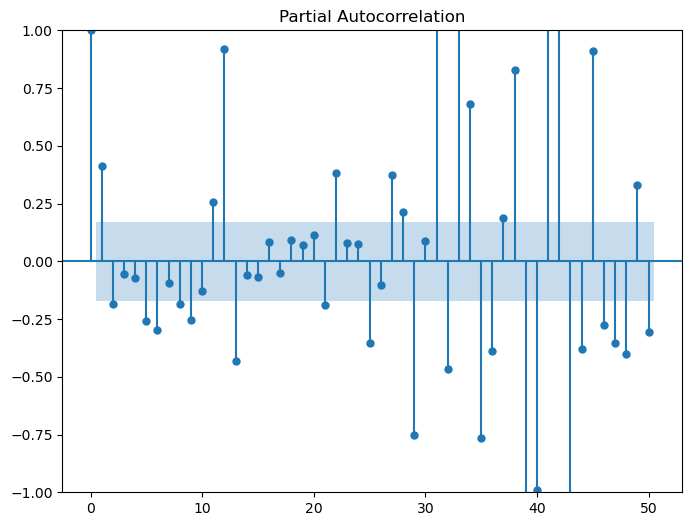

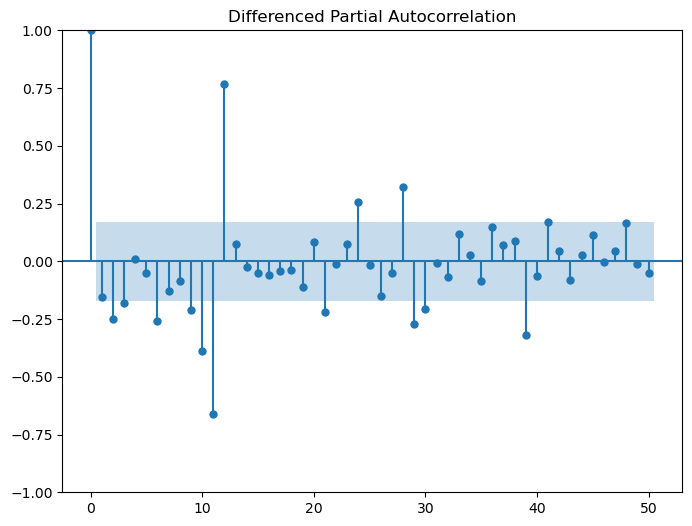

In [119]:
#PACF
plot_pacf(train['Sparkling'],lags=50)
plot_pacf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Partial Autocorrelation')
plt.show()

In [120]:
ARIMA_manual = ARIMA(train['Sparkling'], order=(0,1,0), freq='M')

results_manual_ARIMA = ARIMA_manual.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1132.832
Date:                Sat, 16 Dec 2023   AIC                           2267.663
Time:                        17:43:44   BIC                           2270.538
Sample:                    01-31-1980   HQIC                          2268.831
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.885e+06   1.29e+05     14.658      0.000    1.63e+06    2.14e+06
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):               198.83
Prob(Q):                              0.08   Pr

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


**Prediction on the test set**

In [121]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [122]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
print("RMSE is %4.2f" %rmse)

RMSE is 3864.28


In [123]:
temp_resultsDf1 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA - ACF & PACF (0,1,0)'])
temp_resultsDf1

,Test RMSE
"ARIMA - ACF & PACF (0,1,0)",3864.279352


In [124]:
results_final=pd.concat([results_final,temp_resultsDf1])
results_final

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
"Alpha=0.0702,SimpleExponentialSmoothing",1338.012144
"Alpha=0.03,SimpleExponentialSmoothing (based on range)",1292.565292
"Alpha=0.6638, Beta = 9.9662, DoubleExponentialSmoothing",3949.993290
"Alpha=0.3,Beta=6.5,DoubleExponentialSmoothing (based on range)",18126.679795
"Alpha=0.1119,Beta=0.0497,Gamma=0.3616,TripleExponentialSmoothing",406.510170
"Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing (based on range)",317.434302
"ARIMA-AIC(2,1,2)",1299.979692


In [125]:
pred_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

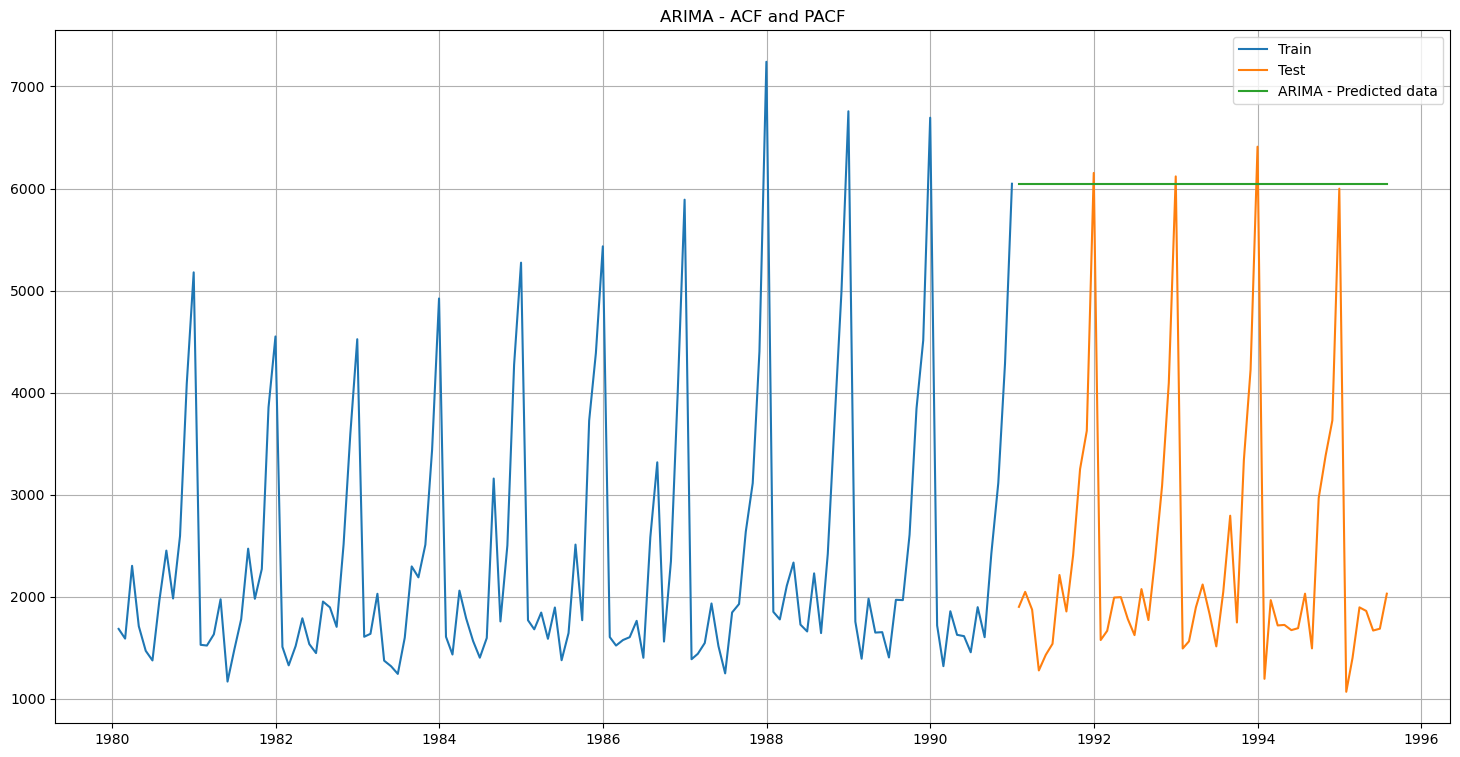

In [126]:
plt.figure(figsize=(18,9))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(test['Sparkling'].index, pred_ARIMA, label='ARIMA - Predicted data')

plt.title('ARIMA - ACF and PACF')
plt.legend(loc='best')
plt.grid();

## 1.7) Ans:

In [127]:
results_final

,Test RMSE
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
"Alpha=0.0702,SimpleExponentialSmoothing",1338.012144
"Alpha=0.03,SimpleExponentialSmoothing (based on range)",1292.565292
"Alpha=0.6638, Beta = 9.9662, DoubleExponentialSmoothing",3949.993290
"Alpha=0.3,Beta=6.5,DoubleExponentialSmoothing (based on range)",18126.679795
"Alpha=0.1119,Beta=0.0497,Gamma=0.3616,TripleExponentialSmoothing",406.510170
"Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing (based on range)",317.434302
"ARIMA-AIC(2,1,2)",1299.979692


In [128]:
results_final.sort_values(by='Test RMSE')

,Test RMSE
"Alpha=0.4,Beta=0.1,Gamma=0.2,TripleExponentialSmoothing (based on range)",317.434302
"Alpha=0.1119,Beta=0.0497,Gamma=0.3616,TripleExponentialSmoothing",406.510170
SimpleAverageModel,1275.081804
"Alpha=0.03,SimpleExponentialSmoothing (based on range)",1292.565292
"ARIMA-AIC(2,1,2)",1299.979692
"Alpha=0.0702,SimpleExponentialSmoothing",1338.012144
RegressionOnTime,1389.135175
NaiveModel,3864.279352
"ARIMA - ACF & PACF (0,1,0)",3864.279352
"Alpha=0.6638, Beta = 9.9662, DoubleExponentialSmoothing",3949.993290


## 1.8) Ans:

In [129]:
complete_data=ExponentialSmoothing(df,trend='additive',seasonal='multiplicative',freq='M').fit(smoothing_level=0.4, smoothing_trend=0.1, smoothing_seasonal=0.2)

In [130]:
complete_data_predict=complete_data.forecast(steps=12)

In [131]:
RMSE_complete_data = metrics.mean_squared_error(df['Sparkling'],complete_data.fittedvalues,squared=False)

print('RMSE:',RMSE_complete_data)

RMSE: 376.77461751552346


In [132]:
# Getting the predictions on test data
prediction_1 = complete_data.forecast(steps=12)

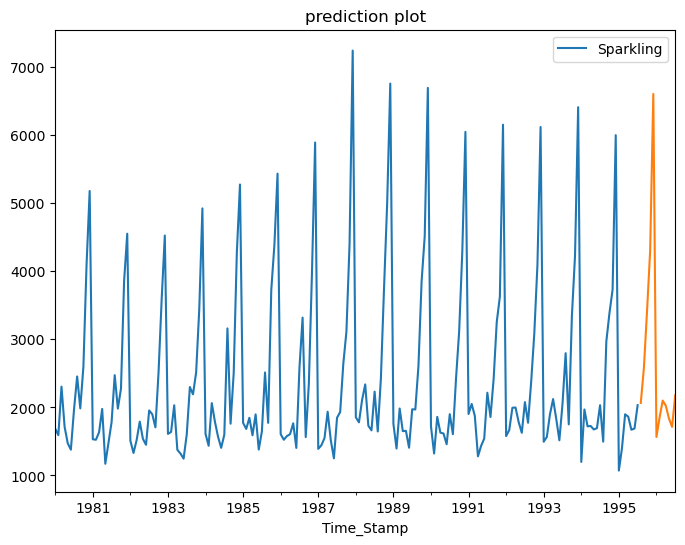

In [133]:
df.plot()
plt.title('prediction plot')
prediction_1.plot();

In [134]:
# 95% confidence interval
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(complete_data.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(complete_data.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,1322.989439,2063.449104,2803.908768
1995-09-30,1838.948126,2579.407790,3319.867455
1995-10-31,2676.195188,3416.654853,4157.114518
1995-11-30,3564.018143,4304.477808,5044.937472
1995-12-31,5864.417563,6604.877227,7345.336892


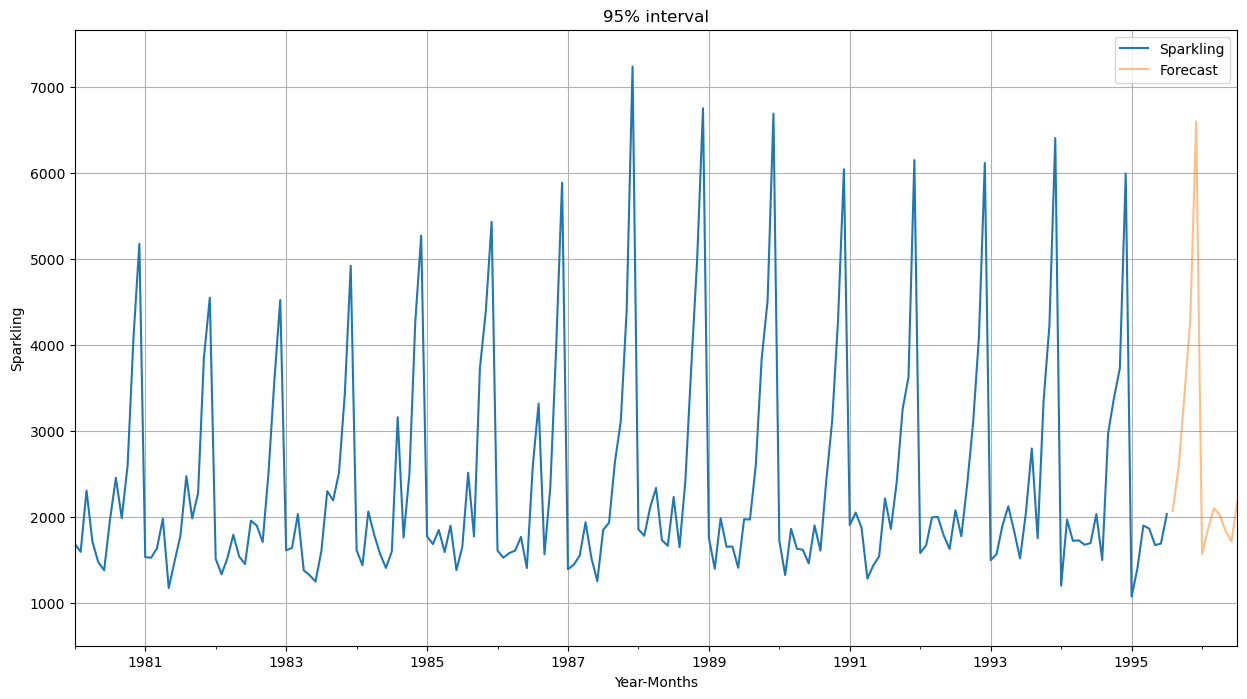

In [135]:
# Plot
axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.title('95% interval')
plt.grid()
plt.show()

In [136]:
# 90% confidence interval
pred_2_df = pd.DataFrame({'lower_CI':prediction_1 - 1.64*np.std(complete_data.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.64*np.std(complete_data.resid,ddof=1)})
pred_2_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,1443.880813,2063.449104,2683.017395
1995-09-30,1959.839499,2579.407790,3198.976081
1995-10-31,2797.086562,3416.654853,4036.223144
1995-11-30,3684.909517,4304.477808,4924.046099
1995-12-31,5985.308937,6604.877227,7224.445518


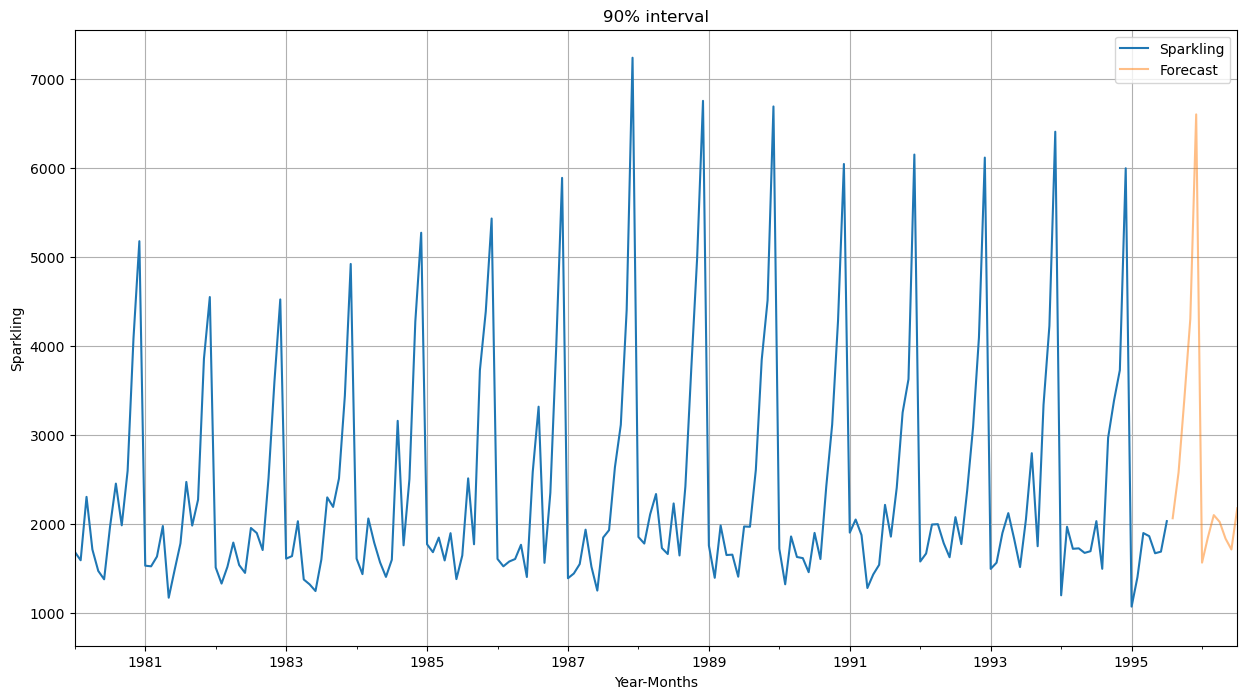

In [137]:
axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_2_df.index, pred_2_df['lower_CI'], pred_2_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.title('90% interval')
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


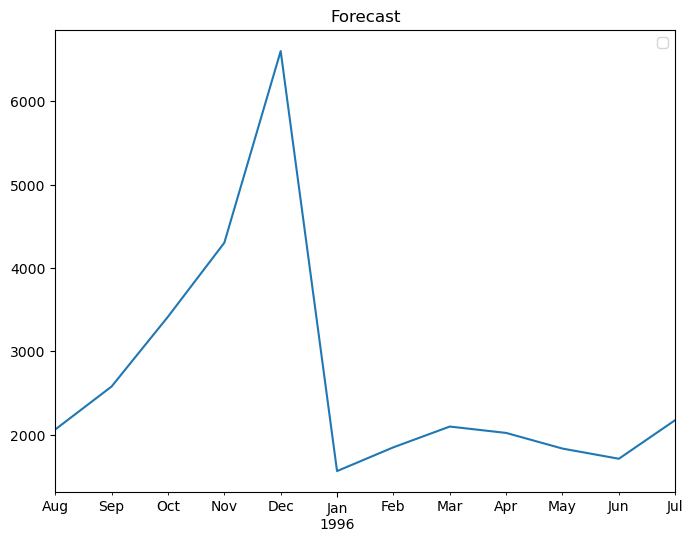

In [138]:
prediction_1.plot()
plt.title('Forecast')
plt.legend(loc='best');

## 1.9) Ans:

In [139]:
prediction_1

1995-08-31    2063.449104
1995-09-30    2579.407790
1995-10-31    3416.654853
1995-11-30    4304.477808
1995-12-31    6604.877227
1996-01-31    1564.539909
1996-02-29    1849.760084
1996-03-31    2098.878899
1996-04-30    2022.428802
1996-05-31    1834.540636
1996-06-30    1712.408941
1996-07-31    2176.425614
Freq: M, dtype: float64

In [140]:
prediction_1.describe()

count      12.000000
mean     2685.654139
std      1464.252594
min      1564.539909
25%      1845.955222
50%      2081.164001
75%      2788.719556
max      6604.877227
dtype: float64